In [341]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Matplotlib basics

Галлерея для изучения: https://matplotlib.org/gallery.html

## Line plot

In [314]:
n=100
a = np.sum([
    [2+x/n for x in range(n)],
    [0.2*np.sin(4*np.pi*x/n) for x in range(n)],
    np.random.normal(scale=0.05,size=n)
],axis=0)
a[:20]


array([ 2.05689408,  2.04267611,  2.11945364,  2.00265219,  2.10312792,
        2.16169823,  2.11339971,  2.26613321,  2.25663032,  2.19625571,
        2.25457249,  2.34051078,  2.24249947,  2.35766956,  2.26405888,
        2.43740364,  2.32223628,  2.37275406,  2.38991034,  2.31617564])

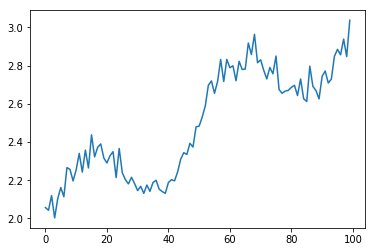

In [315]:
plt.plot(a)
plt.show()

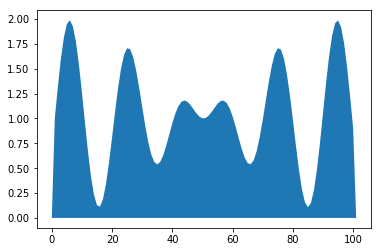

In [82]:
n = 100
a = [0]+[(1+ np.cos(0.1*i/np.pi)*x) for i,x in enumerate([np.sin(x/np.pi) for x in range(n)])]+[0]
plt.fill(a)
plt.show()

## Bar plot

### hystogram-like

In [43]:
n = 10
left = range(n)
height = [1+x for x in np.random.exponential(4,n)]

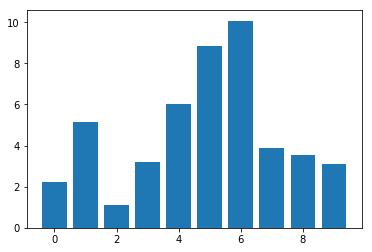

In [44]:
plt.bar(left=left,height=height)
plt.show()

### Horizontal

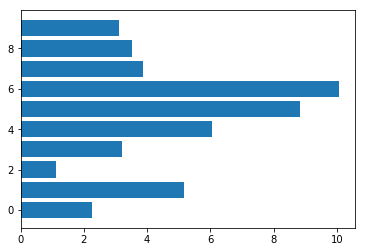

In [48]:
plt.barh(bottom=left,width=height)
plt.show()

## Scatterplot

### 2d scatterplot

In [108]:
n = 1000
x = np.random.exponential(scale=2,size=n)
y = [5 + x_*0.5 + np.random.normal(0,1.5) for x_ in x]

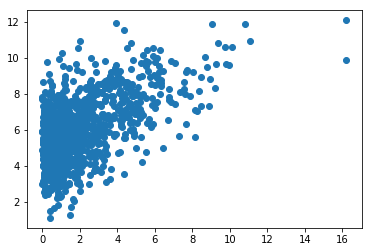

In [109]:
plt.scatter(x,y)
plt.show()

### 3d Scatterplot

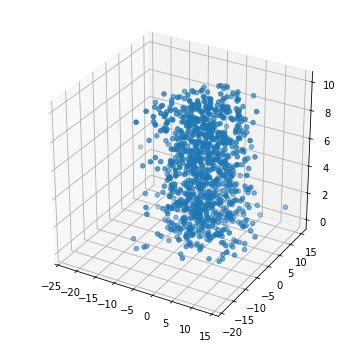

In [245]:
from mpl_toolkits.mplot3d import Axes3D
n = 1000
x = np.random.normal(0,5,n)
y = np.random.normal(0,5,n)
z = np.random.uniform(low=0,high=10,size=n)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()

# Statistical plots

## Boxplot

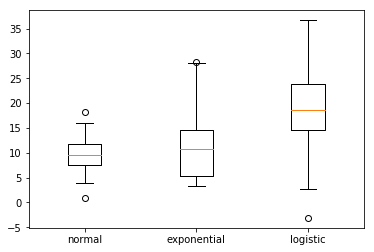

In [118]:
a = np.random.normal(loc=10,scale=3,size=100)
b = [3 + x for x in np.random.exponential(scale=10,size=50)]
c = np.random.logistic(loc=20,scale=3,size=80)
m = [a,b,c]
labels = ['normal','exponential','logistic']
plt.boxplot(m,labels=labels)
plt.show()

## Violin plot

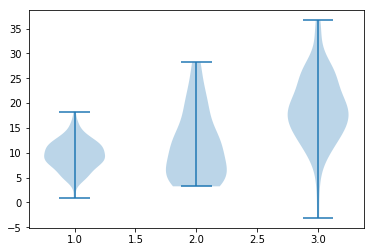

In [120]:
plt.violinplot(m)
plt.show()

## Histogram

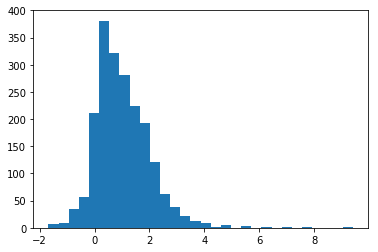

In [135]:
a = list(np.random.exponential(scale=1,size=1000)) + list(np.random.normal(1,1,1000))
plt.hist(a,bins=30)
plt.show()

## 2D density

### 2d histogram

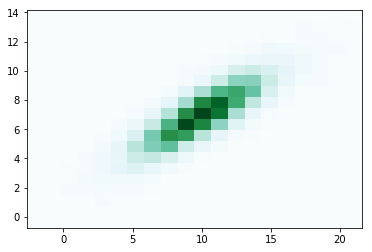

In [256]:
n = 10000
x = np.random.normal(10,3,n)
y = [2+x_*0.5+np.random.normal(0,1) for x_ in x]
plt.hist2d(x,y,bins=20,cmap='BuGn')
plt.show()

### Hexbin

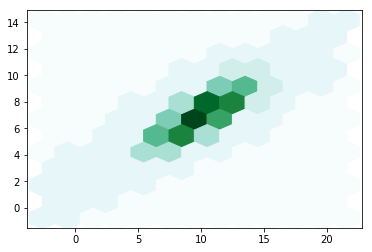

In [257]:
plt.hexbin(x,y,bins=10,gridsize=(12,6),cmap='BuGn')
plt.show()

### 2D contour

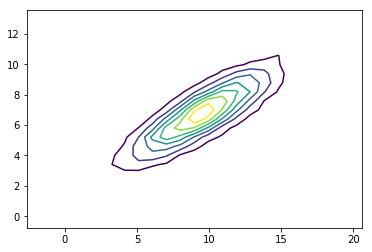

In [269]:
h,xe,ye = np.histogram2d(x,y,bins=25)
X,Y = np.meshgrid(xe[:-1],ye[:-1])
plt.contour(X,Y,h)
plt.show()

# Radial

## Piechart

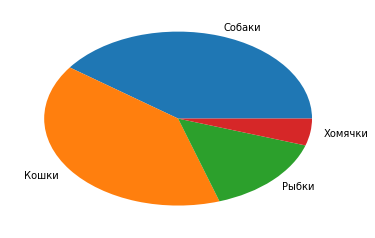

In [141]:
s = [0.4,0.4,0.15,0.05]
l = ['Собаки','Кошки','Рыбки','Хомячки']
plt.pie(s,labels=l)
plt.show()

## Radial plot

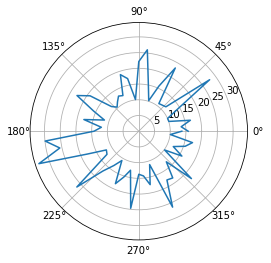

In [162]:
n = 60
x = [2*np.pi*x/n for x in range(n+1)]
y = [10+y for y in np.random.exponential(scale=5,size=n+1)]
ax = plt.subplot(111, projection='polar')
ax.plot(x,y)
plt.show()

# Кастомизация диаграммы

## Figure & Axes

### Несколько диаграмм на одной панели

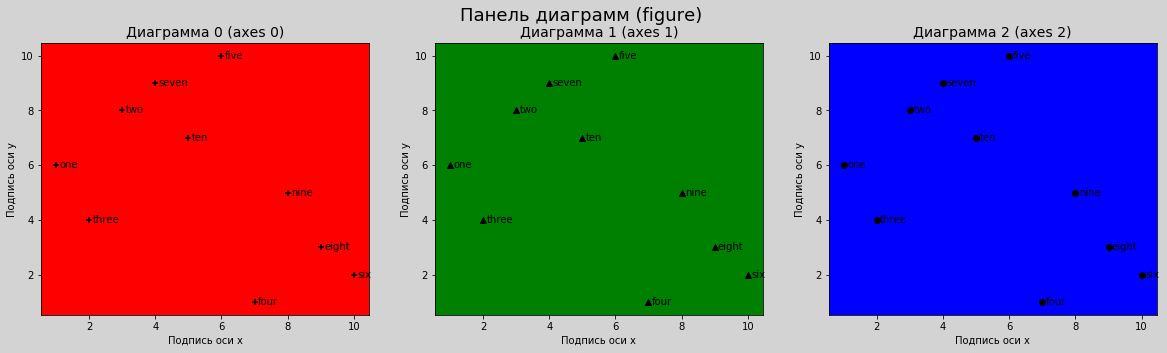

In [214]:
xs = [1,3,2,7,6,10,4,9,8,5]
ys = [6,8,4,1,10,2,9,3,5,7]
ls = ['one','two','three','four','five','six','seven','eight','nine','ten']
axes_bg_colors=['red','green','blue']
markers=['+','^','o']
fig,axs = plt.subplots(ncols=3,nrows=1,facecolor='lightgrey')
fig.set_size_inches(20,5)
fig.suptitle('Панель диаграмм (figure)',fontsize=18)
for i in range(3):
    ax = axs[i]
    ax.scatter(x=xs,y=ys,color='black',marker=markers[i])
    ax.set_title('Диаграмма '+str(i)+' (axes '+str(i)+')',fontsize=14)
    ax.set_facecolor(color=axes_bg_colors[i])
    ax.set_ylabel('Подпись оси y')
    ax.set_xlabel('Подпись оси x')
    for txt,x,y in zip(ls,xs,ys):
        ax.annotate(txt,(x+0.1,y-0.1),fontsize=10)
plt.show()

### Объединение ячеек

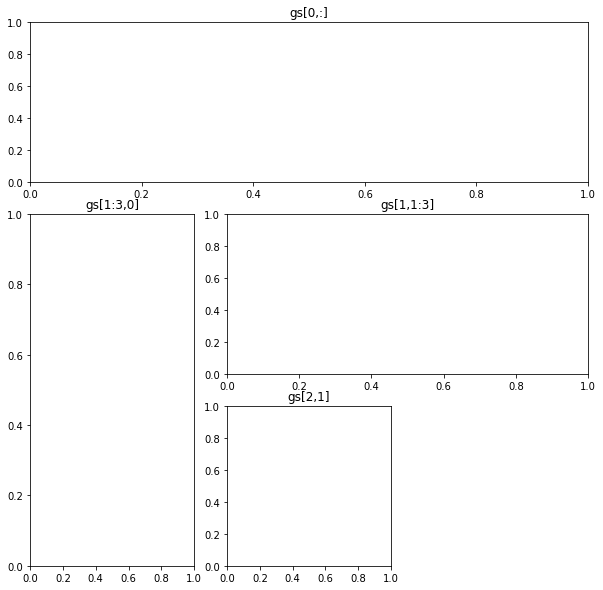

In [339]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
ax1.set_title('gs[0,:]')
ax2 = plt.subplot(gs[1:3, 0])
ax2.set_title('gs[1:3,0]')
ax3 = plt.subplot(gs[1,1:3])
ax3.set_title('gs[1,1:3]')
ax4 = plt.subplot(gs[2,1])
ax4.set_title('gs[2,1]')
plt.show()

## Стили

/Users/sermolov/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


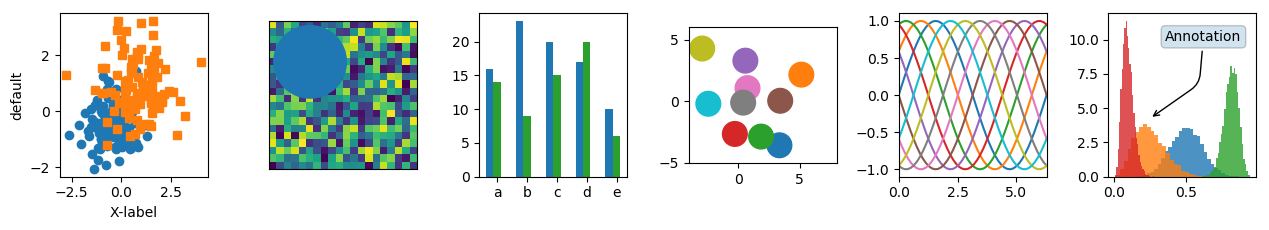

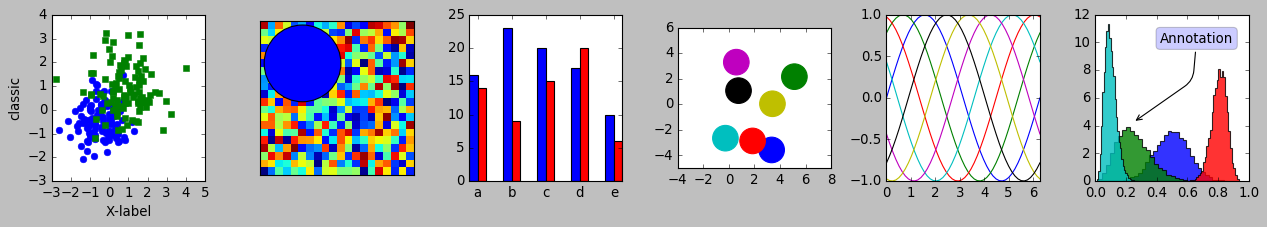

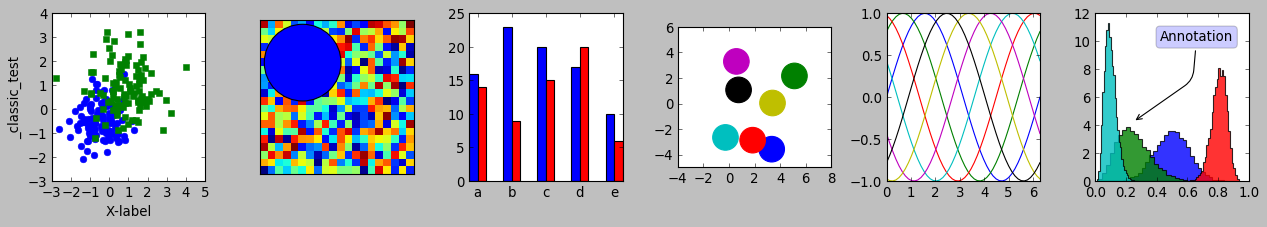

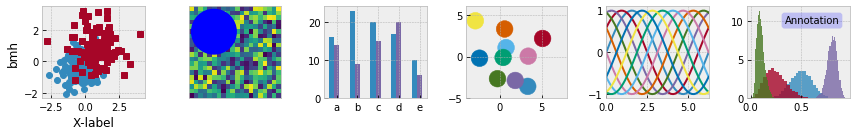

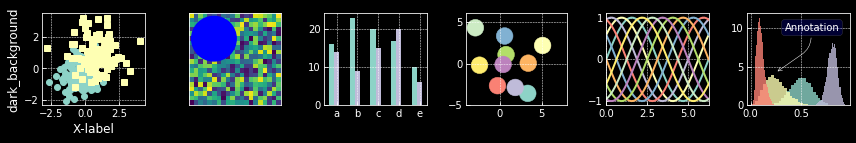

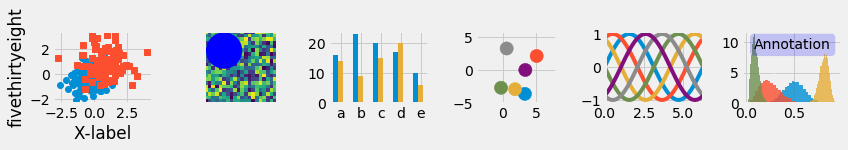

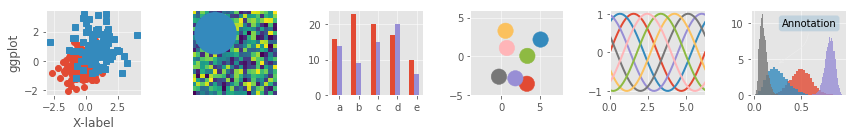

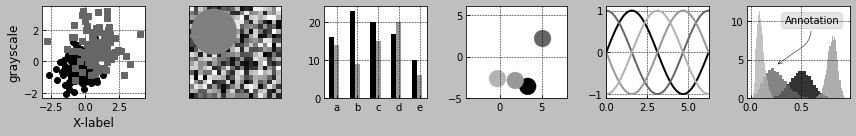

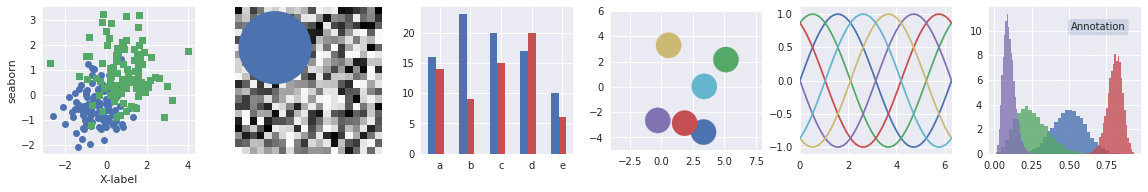

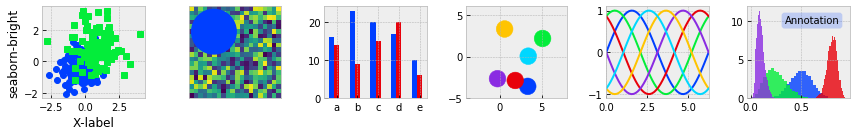

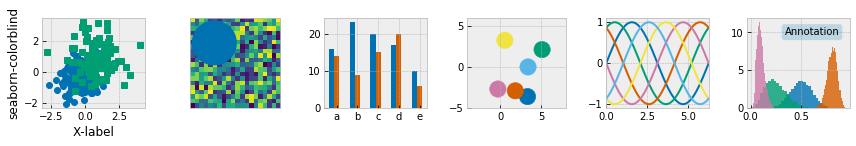

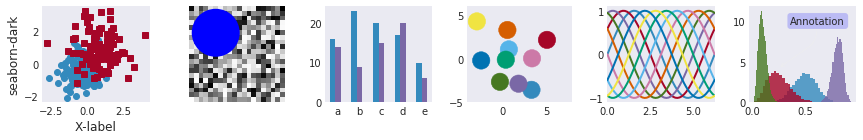

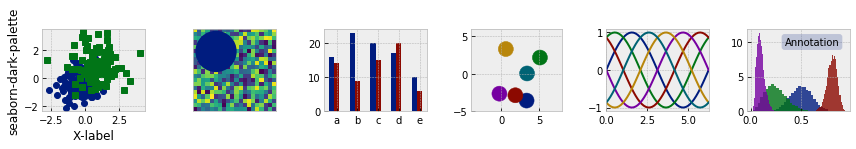

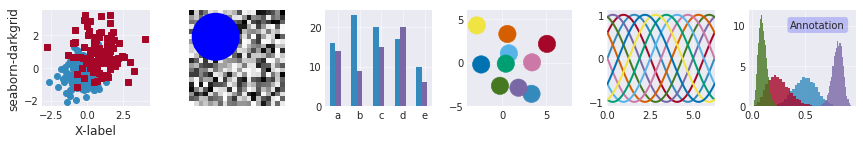

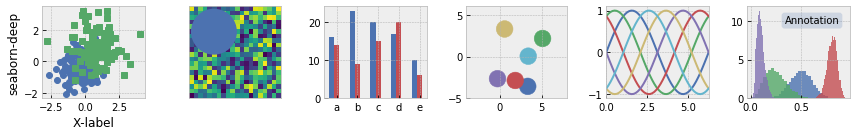

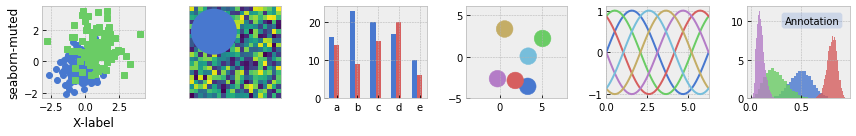

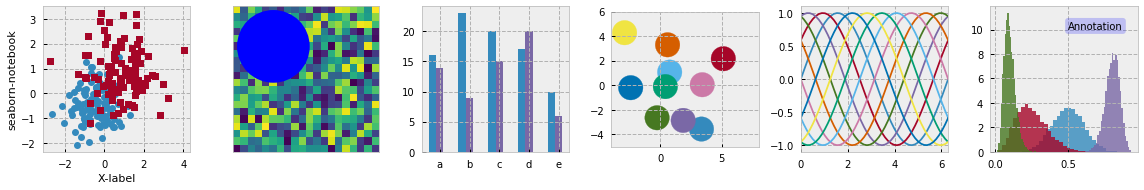

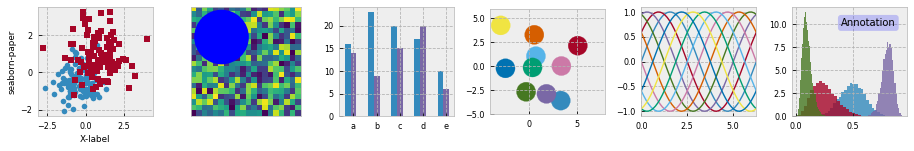

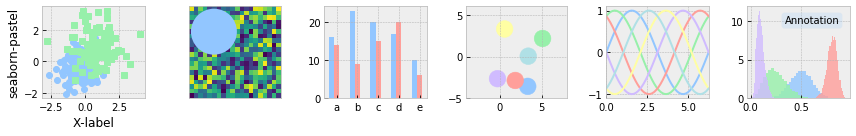

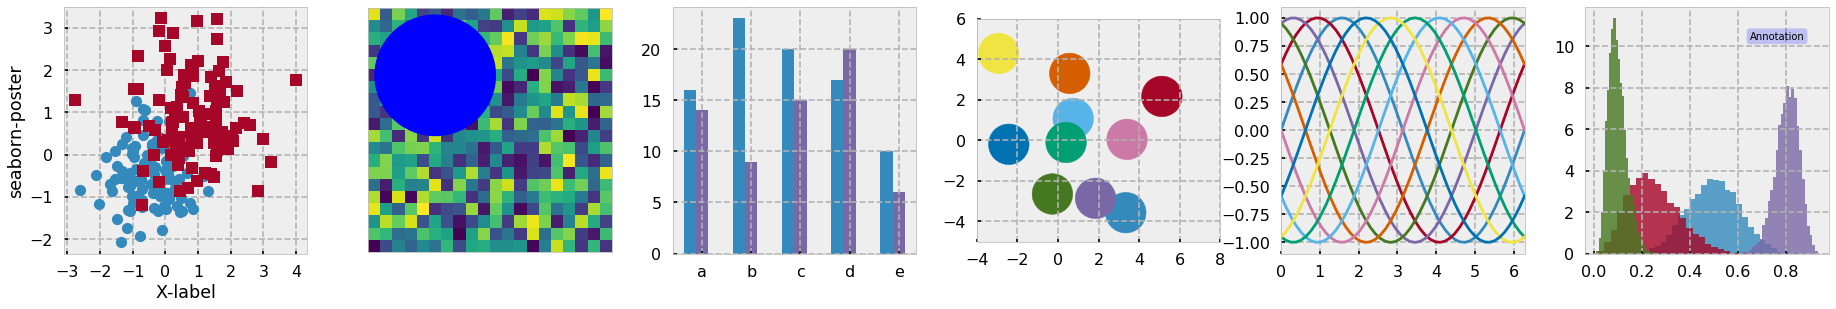

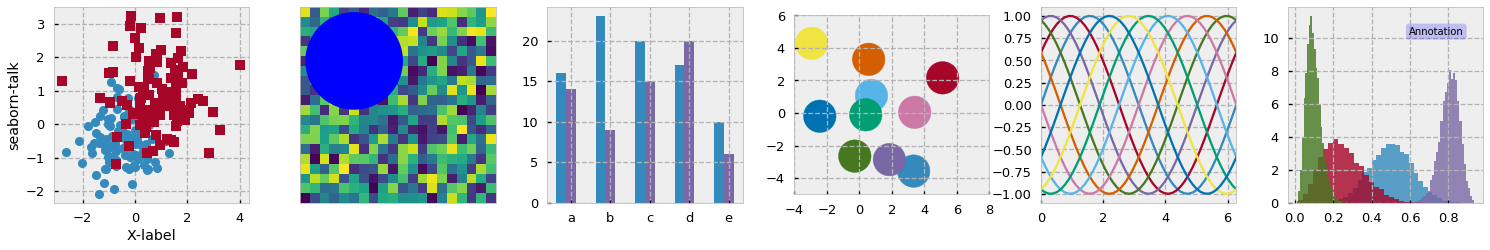

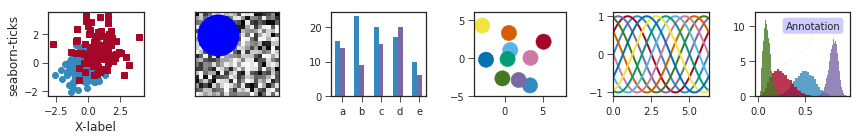

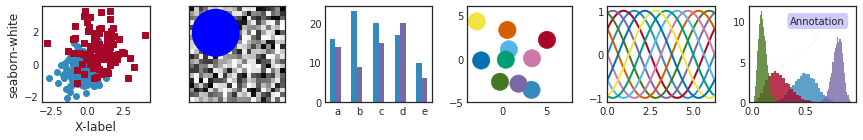

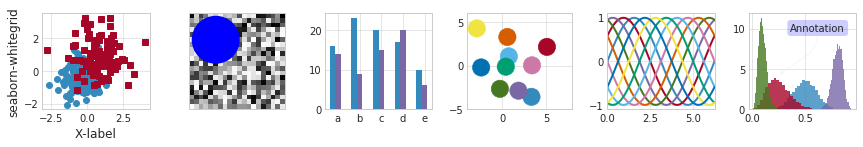

In [376]:
def plot_scatter(ax, prng, nb_samples=100):
    """Scatter plot.
    """
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y = prng.normal(loc=mu, scale=sigma, size=(2, nb_samples))
        ax.plot(x, y, ls='none', marker=marker)
    ax.set_xlabel('X-label')
    return ax


def plot_colored_sinusoidal_lines(ax):
    """Plot sinusoidal lines with colors following the style color cycle.
    """
    L = 2 * np.pi
    x = np.linspace(0, L)
    nb_colors = len(plt.rcParams['axes.prop_cycle'])
    shift = np.linspace(0, L, nb_colors, endpoint=False)
    for s in shift:
        ax.plot(x, np.sin(x + s), '-')
    ax.set_xlim([x[0], x[-1]])
    return ax


def plot_bar_graphs(ax, prng, min_value=5, max_value=25, nb_samples=5):
    """Plot two bar graphs side by side, with letters as x-tick labels.
    """
    x = np.arange(nb_samples)
    ya, yb = prng.randint(min_value, max_value, size=(2, nb_samples))
    width = 0.25
    ax.bar(x, ya, width)
    ax.bar(x + width, yb, width, color='C2')
    ax.set_xticks(x + width)
    ax.set_xticklabels(['a', 'b', 'c', 'd', 'e'])
    return ax


def plot_colored_circles(ax, prng, nb_samples=15):
    """Plot circle patches.

    NB: draws a fixed amount of samples, rather than using the length of
    the color cycle, because different styles may have different numbers
    of colors.
    """
    for sty_dict, j in zip(plt.rcParams['axes.prop_cycle'], range(nb_samples)):
        ax.add_patch(plt.Circle(prng.normal(scale=3, size=2),
                                radius=1.0, color=sty_dict['color']))
    # Force the limits to be the same across the styles (because different
    # styles may have different numbers of available colors).
    ax.set_xlim([-4, 8])
    ax.set_ylim([-5, 6])
    ax.set_aspect('equal', adjustable='box')  # to plot circles as circles
    return ax


def plot_image_and_patch(ax, prng, size=(20, 20)):
    """Plot an image with random values and superimpose a circular patch.
    """
    values = prng.random_sample(size=size)
    ax.imshow(values, interpolation='none')
    c = plt.Circle((5, 5), radius=5, label='patch')
    ax.add_patch(c)
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])


def plot_histograms(ax, prng, nb_samples=10000):
    """Plot 4 histograms and a text annotation.
    """
    params = ((10, 10), (4, 12), (50, 12), (6, 55))
    for a, b in params:
        values = prng.beta(a, b, size=nb_samples)
        ax.hist(values, histtype="stepfilled", bins=30, alpha=0.8, normed=True)
    # Add a small annotation.
    ax.annotate('Annotation', xy=(0.25, 4.25), xycoords='data',
                xytext=(0.9, 0.9), textcoords='axes fraction',
                va="top", ha="right",
                bbox=dict(boxstyle="round", alpha=0.2),
                arrowprops=dict(
                          arrowstyle="->",
                          connectionstyle="angle,angleA=-95,angleB=35,rad=10"),
                )
    return ax


def plot_figure(style_label=""):
    """Setup and plot the demonstration figure with a given style.
    """
    # Use a dedicated RandomState instance to draw the same "random" values
    # across the different figures.
    prng = np.random.RandomState(96917002)

    # Tweak the figure size to be better suited for a row of numerous plots:
    # double the width and halve the height. NB: use relative changes because
    # some styles may have a figure size different from the default one.
    (fig_width, fig_height) = plt.rcParams['figure.figsize']
    fig_size = [fig_width * 2, fig_height / 2]

    fig, axes = plt.subplots(ncols=6, nrows=1, num=style_label,
                             figsize=fig_size, squeeze=True)
    axes[0].set_ylabel(style_label)

    plot_scatter(axes[0], prng)
    plot_image_and_patch(axes[1], prng)
    plot_bar_graphs(axes[2], prng)
    plot_colored_circles(axes[3], prng)
    plot_colored_sinusoidal_lines(axes[4])
    plot_histograms(axes[5], prng)

    fig.tight_layout()

    return fig


if __name__ == "__main__":

    # Setup a list of all available styles, in alphabetical order but
    # the `default` and `classic` ones, which will be forced resp. in
    # first and second position.
    style_list = list(plt.style.available)  # *new* list: avoids side effects.
    style_list.remove('classic')  # `classic` is in the list: first remove it.
    style_list.sort()
    style_list.insert(0, u'default')
    style_list.insert(1, u'classic')

    # Plot a demonstration figure for every available style sheet.
    for style_label in style_list:
        with plt.style.context(style_label):
            fig = plot_figure(style_label=style_label)

    plt.show()

# Пример №1, Временной ряд

In [380]:
df = pd.read_csv('https://timeseries.weebly.com/uploads/2/1/0/8/21086414/sea_ice.csv')
df['Time'] = pd.to_datetime(df['Time'],format='%YM%m')
df['Sum'] = df['Arctic'] + df['Antarctica']
df.head(5)

,Time,Arctic,Antarctica,Sum
0,1990-01-01,12.72,3.27,15.99
1,1990-02-01,13.33,2.15,15.48
2,1990-03-01,13.44,2.71,16.15
3,1990-04-01,12.16,5.10,17.26
4,1990-05-01,10.84,7.37,18.21


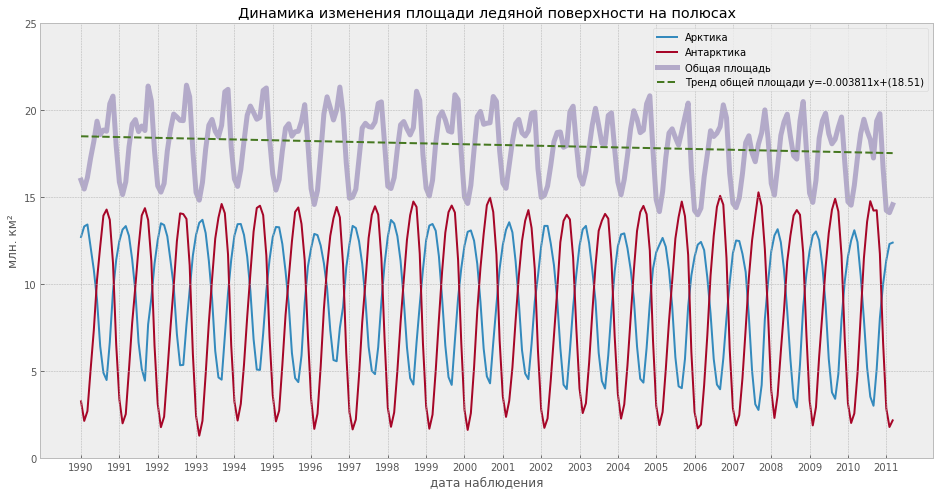

In [395]:
plt.style.use('bmh')
fig = plt.figure(figsize=(16,8))
plt.grid(True,zorder=-10)
plt.title('Динамика изменения площади ледяной поверхности на полюсах')
plt.plot(df['Arctic'],label='Арктика',zorder=-5)
plt.plot(df['Antarctica'],label='Антарктика',zorder=0)

plt.plot(df['Sum'],label='Общая площадь',zorder=0,linewidth=5.0,alpha=0.5)
x = range(len(df))
z = np.polyfit(x, df['Sum'], 1)
p = np.poly1d(z)
plt.plot(x,p(x),"--",label='Тренд общей площади y=%.6fx+(%.2f)'%(z[0],z[1]),zorder=5)
plt.xticks(
    range(0,df.shape[0],12), # Каждый 12-й тик
    df['Time'][::12].apply(lambda x:str(x).split('-')[0])) # Только год наблюдения
plt.ylabel('млн. км²')
plt.xlabel('дата наблюдения')
plt.ylim((0,25))
plt.legend()
plt.show()

In [420]:
df = pd.read_csv('http://data.gov.ru/opendata/8901003315-pricefuel/data-20171009T0659-structure-20171009T0659.csv?encoding=UTF-8',index_col='name_fuel')
df.columns = ['РосНефть','Лукойл','ЯмалГосснаб','Среднее']
df.index.rename('Топливо',inplace=True)
df = df.T
df.columns = ['АИ-95','АИ-92','Дизель']
df

,АИ-95,АИ-92,Дизель
РосНефть,39.90,38.20,40.9
Лукойл,40.40,38.70,41.0
ЯмалГосснаб,39.50,37.50,39.0
Среднее,39.93,38.13,40.3


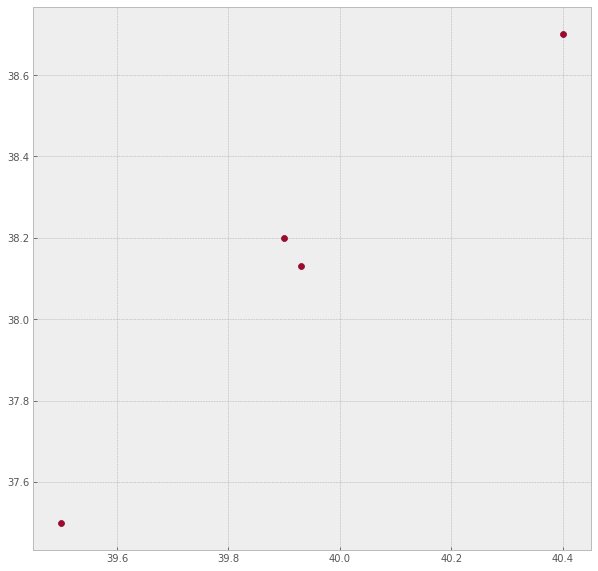

In [423]:
plt.scatter(df['АИ-95'],df['АИ-92'])
plt.
plt.show()